In [4]:
from google.colab import auth
auth.authenticate_user()
 
import gspread
from oauth2client.client import GoogleCredentials
import pandas as pd
 
gc = gspread.authorize(GoogleCredentials.get_application_default())
 
wb = gc.open_by_key('1L9TWqBA29vdBuys5kF4_KuMqGxvpud41hQWLH2Q-VQE')
 
ws = wb.worksheet('7. Udemy Courses')
 
# get_all_values gives a list of rows.
rows = ws.get_all_values()
#print(rows)
 
# Convert to a DataFrame and render.
 
 
df=pd.DataFrame.from_records(rows[1:1001],columns=rows[0])
cl = df.drop_duplicates()
print(cl)

    course_id  ...              subject
0      288942  ...  Musical Instruments
1     1170074  ...  Musical Instruments
2     1193886  ...  Musical Instruments
3     1116700  ...  Musical Instruments
4     1120410  ...  Musical Instruments
..        ...  ...                  ...
995    966522  ...  Musical Instruments
996   1232356  ...  Musical Instruments
997    852426  ...  Musical Instruments
998    513528  ...  Musical Instruments
999    644020  ...     Business Finance

[1000 rows x 11 columns]


In [5]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            1000 non-null   object
 1   course_title         1000 non-null   object
 2   is_paid              1000 non-null   object
 3   price                1000 non-null   object
 4   num_subscribers      1000 non-null   object
 5   num_reviews          1000 non-null   object
 6   num_lectures         1000 non-null   object
 7   level                1000 non-null   object
 8   content_duration     1000 non-null   object
 9   published_timestamp  1000 non-null   object
 10  subject              1000 non-null   object
dtypes: object(11)
memory usage: 93.8+ KB


In [6]:
cl.describe(include='all')

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,995,2,36,757,248,160,4,74,1000,4
top,188692,Creating an animated greeting card via Google ...,TRUE,20,0,0,12,All Levels,1 hour,2016-04-27T04:22:31Z,Business Finance
freq,1,3,921,239,22,105,35,542,147,1,325


In [7]:
dff = cl.drop(columns=['course_id','published_timestamp'])
dff.head(5)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,#1 Piano Hand Coordination: Play 10th Ballad i...,TRUE,35,3137,18,68,All Levels,1.5 hours,Musical Instruments
1,#10 Hand Coordination - Transfer Chord Ballad ...,TRUE,75,1593,1,41,Intermediate Level,1 hour,Musical Instruments
2,#12 Hand Coordination: Let your Hands dance wi...,TRUE,75,482,1,47,Intermediate Level,1.5 hours,Musical Instruments
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,TRUE,75,850,3,43,Intermediate Level,1 hour,Musical Instruments
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,TRUE,75,940,3,32,Intermediate Level,37 mins,Musical Instruments


In [8]:
dff = dff.drop_duplicates(['course_title'],keep='last')
dff.shape

(995, 9)

In [12]:
print(f"Total len of columns in givern dataset:- {cl.shape[0]}\nAfter removing duplicate,len of columns:- {dff.shape[0]}\nTotal no of Duplicate columns:-\t{cl.shape[0]-dff.shape[0]}")

Total len of columns in givern dataset:- 1000
After removing duplicate,len of columns:- 995
Total no of Duplicate columns:-	5


In [17]:
s0 = dff.sample(955)
s0.head(995)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
664,Building Web Applications with Spring MVC,TRUE,85,714,48,28,All Levels,3 hours,Web Development
322,Aprende a improvisar en la guitarra eléctrica,TRUE,50,3,0,19,All Levels,3 hours,Musical Instruments
548,Bookkeeping Basics: Understand the Fundamentals,TRUE,75,853,45,48,Beginner Level,4.5 hours,Business Finance
886,Create a MEAN App by Example - Full Stack Course,TRUE,50,421,26,33,Intermediate Level,3.5 hours,Web Development
291,Angular JS Essentials,TRUE,195,4687,99,24,Beginner Level,4 hours,Web Development
...,...,...,...,...,...,...,...,...,...
445,Become a Rockstar Web Developer - Learn By Coding,TRUE,200,2076,125,56,All Levels,11 hours,Web Development
658,Building Data Visualizations with D3 and Angul...,TRUE,125,293,30,31,Beginner Level,3.5 hours,Web Development
399,Bank Reconciliation & VAT on Excel,TRUE,20,30,5,19,All Levels,1.5 hours,Business Finance
111,Accounting Basics - A Complete Study,TRUE,180,1132,70,332,All Levels,29 hours,Business Finance


#Q-1 Which are top selling courses?

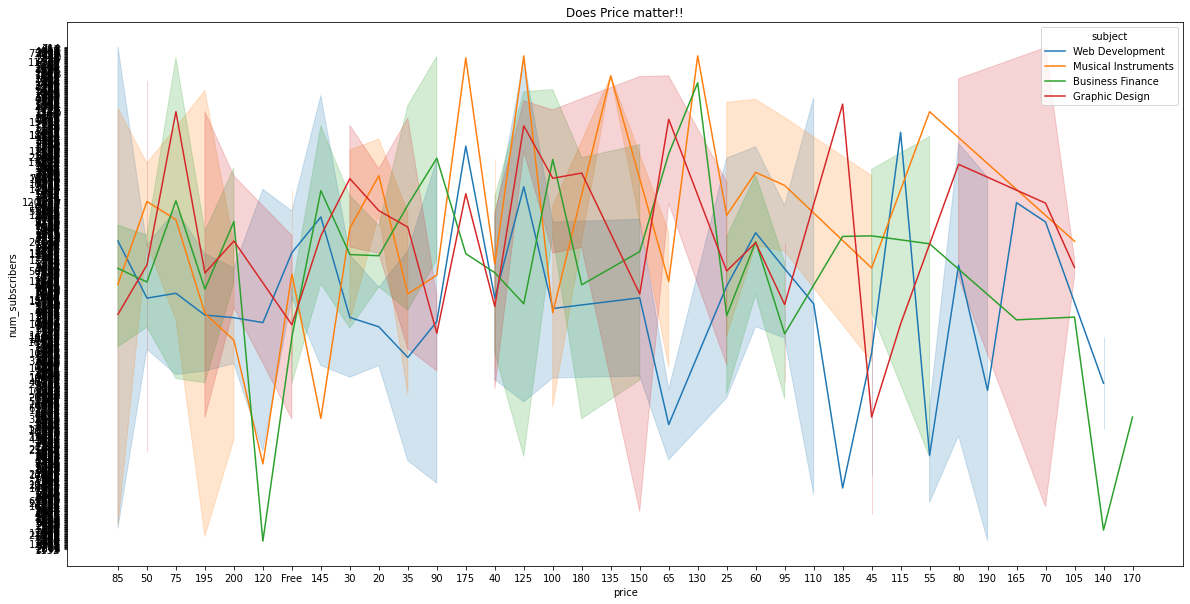

In [36]:
plt.figure(figsize=(20,10))
plt.title("Does Price matter!!")
# s0['price'] = s0['price'].str.replace('Free|TRUE','0')
# s0['price'] = s0['price'].astype('int')
sns.lineplot(data=s0,x='price',y='num_subscribers',hue='subject')
plt.show()

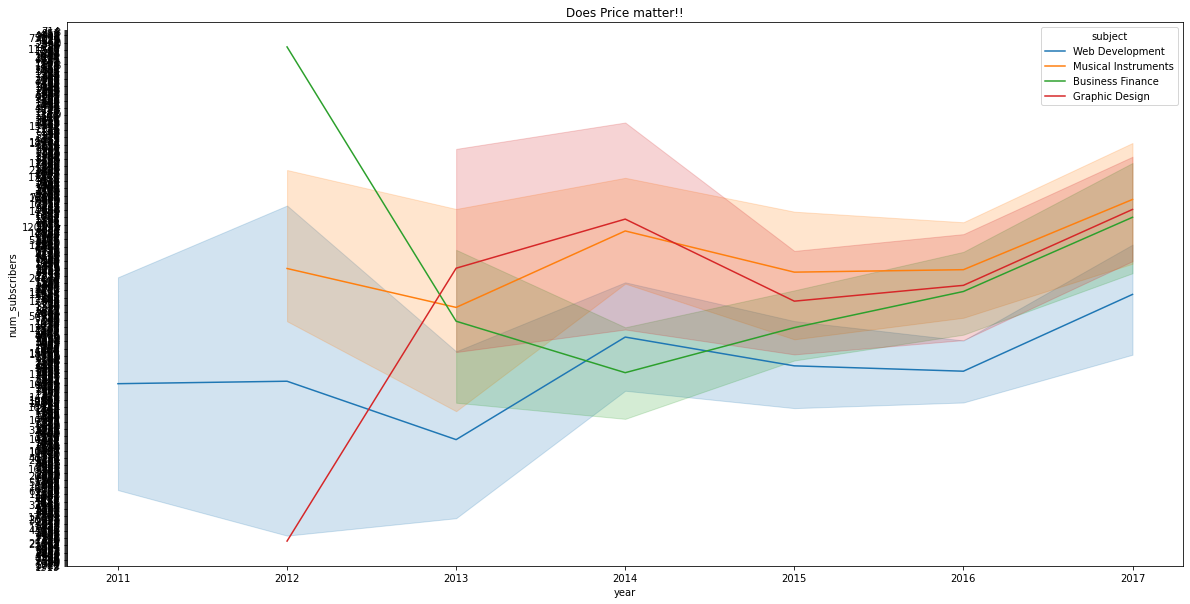

In [37]:
plt.figure(figsize=(20,10))
df1 = s0.copy()
df1['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df1["year"] = df1['published_timestamp'].dt.year
plt.title("Does Price matter!!")
sns.lineplot(data=df1,y='num_subscribers',x='year',hue='subject')
plt.show()

#Q-2 list of free *courses*

In [38]:
 s0[s0.is_paid == False]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject


In [28]:
tft = pd.crosstab(index=s0["is_paid"],columns="Total")
tft

col_0,Total
is_paid,
FALSE,71
TRUE,884


# Q3-Which subject has the maximum number of courses?

In [29]:
s0.subject.value_counts()

Business Finance       312
Web Development        311
Musical Instruments    176
Graphic Design         156
Name: subject, dtype: int64

In [30]:
analysis_data = s0.groupby('subject')
analysis_data.describe()

course_title         ... content_duration     
                           count unique  ...              top freq
subject                                  ...                      
Business Finance             312    312  ...           1 hour   63
Graphic Design               156    156  ...           1 hour   20
Musical Instruments          176    176  ...          3 hours   23
Web Development              311    311  ...           1 hour   33

[4 rows x 32 columns]

#Q-4List out all the courses that are related to 'Java’

In [31]:
searchfor = ['java', 'Java','Jquery','JQuery','jquery']
s0[s0.course_title.str.contains('|'.join(searchfor))]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
242,"Ajax in JavaScript and JQuery, with PHP - Crea...",TRUE,200,3399,85,15,All Levels,1.5 hours,Web Development
96,Accelerated JavaScript Training,TRUE,110,4720,1017,126,All Levels,7.5 hours,Web Development
273,Angular 2 Complete E-Commerce App Course - Jav...,TRUE,195,949,129,89,All Levels,20.5 hours,Web Development
807,Complete JQuery And JQuery UI Course For Beginner,TRUE,80,7169,277,20,Intermediate Level,1 hour,Web Development
61,A Beginner's Guide to the Meteor JavaScript Fr...,TRUE,50,898,132,40,Beginner Level,2 hours,Web Development
656,Building An E-Commerce Store Using Java Spring...,TRUE,95,2743,589,61,All Levels,14.5 hours,Web Development
249,All in one HTML CSS and JQuery,TRUE,20,3444,35,16,All Levels,3 hours,Web Development
643,"Build Your Own Calculator App with Javascript,...",TRUE,50,3688,49,11,All Levels,1 hour,Web Development
681,Byte-Sized-Chunks: Dynamic Prototypes in Javas...,TRUE,20,880,6,24,All Levels,3 hours,Web Development
680,Byte-Sized-Chunks: Closures in Javascript,TRUE,20,1292,2,12,All Levels,2 hours,Web Development
